## 1 . EVOLUCION NACIONAL DEL INDICE DE PRECIOS DE LA VIVIENDA
DATOS DEL INE

In [2]:
# 1. Importa pandas, pyplot y seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [65]:
IPV = pd.read_csv("data/IPV_INE.csv", sep= ";")
IPV.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16320 entries, 0 to 16319
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total Nacional                             16320 non-null  object
 1   Comunidades y Ciudades Autónomas           15504 non-null  object
 2   General, vivienda nueva y de segunda mano  16320 non-null  object
 3   Índices y tasas                            16320 non-null  object
 4   Periodo                                    16320 non-null  object
 5   Total                                      15232 non-null  object
dtypes: object(6)
memory usage: 765.1+ KB


In [66]:
# tras analizar los datos del INE, vamos a empezar estructurando los datos en dos DF, los datos referentes a nivel nacional y los datos de CCAA

#primero vamos a cambiar el nombre a las coliumnas para facilitar el trabajo

IPV = IPV.rename(columns={"Comunidades y Ciudades Autónomas": "CCAA", "General, vivienda nueva y de segunda mano": "TipoV", "Índices y tasas":"Comparador"})
IPV


,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
0,Nacional,NaN,General,Índice,2023T4,"148,690"
1,Nacional,NaN,General,Índice,2023T3,"150,273"
2,Nacional,NaN,General,Índice,2023T2,"146,583"
3,Nacional,NaN,General,Índice,2023T1,"143,580"
4,Nacional,NaN,General,Índice,2022T4,"142,666"
...,...,...,...,...,...,...
16315,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2008T1,NaN
16316,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007T4,NaN
16317,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007T3,NaN
16318,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007T2,NaN


In [67]:

IPV['Periodo'] = pd.to_datetime(IPV['Periodo'].str.replace('T', 'Q'))
IPV

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
0,Nacional,NaN,General,Índice,2023-10-01,"148,690"
1,Nacional,NaN,General,Índice,2023-07-01,"150,273"
2,Nacional,NaN,General,Índice,2023-04-01,"146,583"
3,Nacional,NaN,General,Índice,2023-01-01,"143,580"
4,Nacional,NaN,General,Índice,2022-10-01,"142,666"
...,...,...,...,...,...,...
16315,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2008-01-01,NaN
16316,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007-10-01,NaN
16317,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007-07-01,NaN
16318,Nacional,19 Melilla,Vivienda segunda mano,Variación en lo que va de año,2007-04-01,NaN


In [68]:
IPV = IPV.sort_values(by='Periodo', ascending=True)
IPV.reset_index(drop=True, inplace=True)
IPV

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
0,Nacional,09 Cataluña,Vivienda segunda mano,Variación en lo que va de año,2007-01-01,"1,2"
1,Nacional,07 Castilla y León,Vivienda nueva,Índice,2007-01-01,"131,272"
2,Nacional,07 Castilla y León,General,Variación en lo que va de año,2007-01-01,"2,3"
3,Nacional,07 Castilla y León,General,Variación anual,2007-01-01,"13,0"
4,Nacional,07 Castilla y León,General,Variación trimestral,2007-01-01,"2,3"
...,...,...,...,...,...,...
16315,Nacional,16 País Vasco,General,Variación en lo que va de año,2023-10-01,"3,9"
16316,Nacional,"04 Balears, Illes",General,Variación trimestral,2023-10-01,"-1,2"
16317,Nacional,16 País Vasco,General,Variación anual,2023-10-01,"3,9"
16318,Nacional,16 País Vasco,Vivienda segunda mano,Índice,2023-10-01,"132,191"


In [69]:
IPV_nacional = IPV[IPV["CCAA"].isna()]
IPV_nacional
#ojo en la columna de total , nos aparece del mismo modo el separador  de decimales ","

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
78,Nacional,NaN,Vivienda segunda mano,Variación en lo que va de año,2007-01-01,"2,0"
79,Nacional,NaN,Vivienda segunda mano,Variación anual,2007-01-01,"13,0"
80,Nacional,NaN,Vivienda segunda mano,Variación trimestral,2007-01-01,"2,0"
81,Nacional,NaN,Vivienda segunda mano,Índice,2007-01-01,"164,358"
82,Nacional,NaN,Vivienda nueva,Variación en lo que va de año,2007-01-01,"2,9"
...,...,...,...,...,...,...
16229,Nacional,NaN,General,Variación en lo que va de año,2023-10-01,"4,2"
16235,Nacional,NaN,Vivienda segunda mano,Variación trimestral,2023-10-01,"-1,0"
16237,Nacional,NaN,Vivienda segunda mano,Variación anual,2023-10-01,"3,6"
16239,Nacional,NaN,Vivienda segunda mano,Variación en lo que va de año,2023-10-01,"3,6"


In [70]:
IPV_ccaa = IPV[IPV["CCAA"].notna()]
IPV_ccaa

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
0,Nacional,09 Cataluña,Vivienda segunda mano,Variación en lo que va de año,2007-01-01,"1,2"
1,Nacional,07 Castilla y León,Vivienda nueva,Índice,2007-01-01,"131,272"
2,Nacional,07 Castilla y León,General,Variación en lo que va de año,2007-01-01,"2,3"
3,Nacional,07 Castilla y León,General,Variación anual,2007-01-01,"13,0"
4,Nacional,07 Castilla y León,General,Variación trimestral,2007-01-01,"2,3"
...,...,...,...,...,...,...
16314,Nacional,"04 Balears, Illes",General,Índice,2023-10-01,"165,249"
16315,Nacional,16 País Vasco,General,Variación en lo que va de año,2023-10-01,"3,9"
16316,Nacional,"04 Balears, Illes",General,Variación trimestral,2023-10-01,"-1,2"
16317,Nacional,16 País Vasco,General,Variación anual,2023-10-01,"3,9"


In [71]:
#Vamos a buscar el primer grafico del historico nacional a nivel genera, para posteriormente analizar segun el tipo de vivienda (nueva o segunda mano)

In [72]:
#filtrado por el tipo de vivienda General
IPV_nacional_general = IPV_nacional[IPV_nacional["TipoV"] == "General"]
IPV_nacional_general["Comparador"].unique()


array(['Variación en lo que va de año', 'Índice', 'Variación trimestral',
       'Variación anual'], dtype=object)

In [73]:
IPV_naci_gen_indice = IPV_nacional_general[IPV_nacional_general["Comparador"] == "Índice"]
IPV_naci_gen_indice["Total"] = IPV_naci_gen_indice["Total"] .str.replace(',', '.').astype(float)
IPV_naci_gen_indice

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
237,Nacional,NaN,General,Índice,2007-01-01,145.935
272,Nacional,NaN,General,Índice,2007-04-01,150.103
512,Nacional,NaN,General,Índice,2007-07-01,151.719
931,Nacional,NaN,General,Índice,2007-10-01,150.640
1179,Nacional,NaN,General,Índice,2008-01-01,150.082
...,...,...,...,...,...,...
15223,Nacional,NaN,General,Índice,2022-10-01,142.666
15480,Nacional,NaN,General,Índice,2023-01-01,143.580
15625,Nacional,NaN,General,Índice,2023-04-01,146.583
15946,Nacional,NaN,General,Índice,2023-07-01,150.273


In [74]:
#filtrado por el tipo de vivienda segundamano y nuevo
IPV_nacional_tipos = IPV_nacional[IPV_nacional["TipoV"] != "General"]
IPV_naci_tip_indice = IPV_nacional_tipos[IPV_nacional_tipos["Comparador"] == "Índice"]
IPV_naci_tip_indice["Total"] = IPV_naci_tip_indice["Total"] .str.replace(',', '.').astype(float)
IPV_naci_tip_indice


,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
81,Nacional,NaN,Vivienda segunda mano,Índice,2007-01-01,164.358
205,Nacional,NaN,Vivienda nueva,Índice,2007-01-01,125.956
329,Nacional,NaN,Vivienda segunda mano,Índice,2007-04-01,168.847
425,Nacional,NaN,Vivienda nueva,Índice,2007-04-01,129.748
531,Nacional,NaN,Vivienda segunda mano,Índice,2007-07-01,169.259
...,...,...,...,...,...,...
15680,Nacional,NaN,Vivienda segunda mano,Índice,2023-04-01,143.710
15905,Nacional,NaN,Vivienda segunda mano,Índice,2023-07-01,146.922
16030,Nacional,NaN,Vivienda nueva,Índice,2023-07-01,171.973
16085,Nacional,NaN,Vivienda nueva,Índice,2023-10-01,169.581


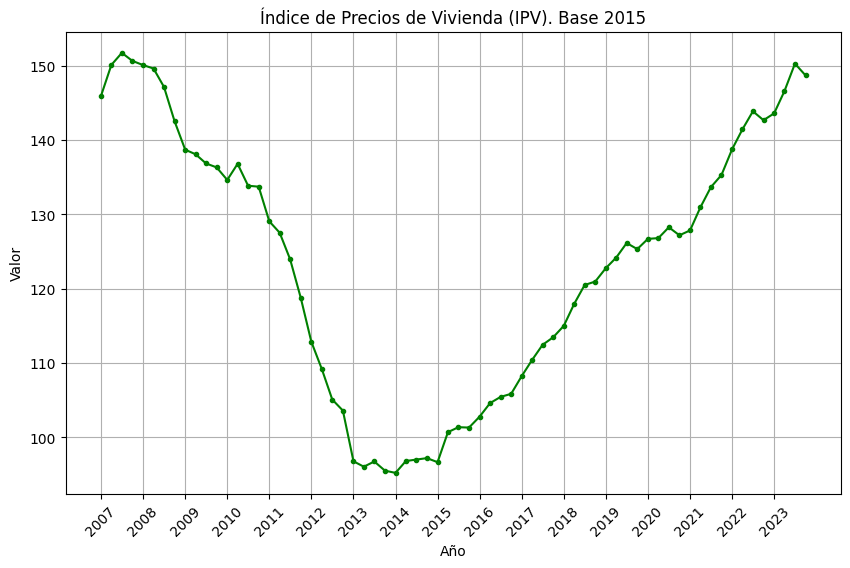

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(IPV_naci_gen_indice['Periodo'], IPV_naci_gen_indice['Total'], label='Total', marker='o', markersize=3, color='green')

plt.title('Índice de Precios de Vivienda (IPV). Base 2015')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Aplicar DateFormatter para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Para mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

# Establecer ticks en el eje X y aplicar rotación
intervalo = 4
ticks = IPV_naci_gen_indice['Periodo'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45)

# Guardar la figura con las configuraciones adecuadas
plt.savefig("1.1.IPV_General.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

Cuando se dice que un índice de precios de la vivienda está "en base 2015", significa que 2015 se toma como año base, con un valor de referencia de 100. En este contexto, los valores del índice se comparan con los precios en 2015 para medir los cambios en el tiempo.

El índice se usa para mostrar cómo han variado los precios de la vivienda a lo largo de los años con respecto al año base:

Si el valor del índice es mayor que 100: Los precios de la vivienda han aumentado en comparación con 2015. Por ejemplo, un índice de 120 indicaría un aumento del 20% en los precios con respecto a 2015.
Si el valor del índice es menor que 100: Los precios de la vivienda han disminuido en comparación con 2015. Por ejemplo, un índice de 90 indicaría una disminución del 10% en los precios con respecto a 2015.
Un índice de precios con base 2015 ayuda a entender la evolución de los precios a lo largo del tiempo y permite comparar cambios relativos. También facilita la comparación con otros índices o datos económicos que usen el mismo año base.


El uso de un año base en un índice de precios, como el índice de precios de la vivienda (IPV), tiene como objetivo proporcionar un punto de referencia común para medir los cambios a lo largo del tiempo. Cuando se elige un año base, se establece un valor de referencia para comparar los valores futuros y analizar las tendencias.

Responder a tus preguntas te da una visión más clara de este concepto y sus beneficios:

## ¿Por qué se hizo en 2015?
Hay varias razones por las cuales el año 2015 pudo haber sido elegido como año base para el índice de precios de la vivienda:

Reciente pero suficientemente distante: Elegir un año base reciente permite que el índice sea relevante para las condiciones económicas y sociales actuales, pero al mismo tiempo lo suficientemente distante para permitir comparaciones significativas en el tiempo.
Estabilidad: Un año base se elige generalmente en un período de relativa estabilidad económica y sin eventos extraordinarios que puedan distorsionar los datos.
Cambio metodológico: A veces, la elección de un año base coincide con cambios en la metodología de recopilación de datos o actualización de estándares, como nuevos cálculos, encuestas o bases de datos.

## ¿Qué método se usaba antes?
El método usado antes de 2015 probablemente también utilizaba un índice con un año base, pero el año base habría sido diferente. Los índices pueden ser reevaluados y actualizados para reflejar cambios en la economía, modificaciones en las mediciones, o nuevos estándares internacionales. Si se cambió el año base, los valores anteriores habrían sido recalculados para que las comparaciones sean consistentes.

## ¿Qué aporte de valor tiene?
El uso de un año base en un índice de precios ofrece varios beneficios:

Comparaciones claras: Al establecer un valor de referencia común, se facilita la comparación entre diferentes períodos y se eliminan distorsiones que pueden surgir de factores externos.
Seguimiento de tendencias: Un índice con año base permite a los analistas rastrear tendencias y observar la evolución de precios a lo largo del tiempo.
Base para políticas y decisiones: Los gobiernos, empresas y economistas pueden usar estos índices para tomar decisiones informadas basadas en tendencias consistentes.
La elección del año base no es arbitraria y suele reflejar la necesidad de actualizar las referencias para mantener la relevancia del índice en un entorno económico en evolución. A medida que cambian las condiciones económicas, puede ser necesario reevaluar y elegir un nuevo año base para asegurar la precisión y la consistencia en el análisis de datos

In [292]:
IPV_naci_tip_indice

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
81,Nacional,NaN,Vivienda segunda mano,Índice,2007-01-01,164.358
205,Nacional,NaN,Vivienda nueva,Índice,2007-01-01,125.956
329,Nacional,NaN,Vivienda segunda mano,Índice,2007-04-01,168.847
425,Nacional,NaN,Vivienda nueva,Índice,2007-04-01,129.748
531,Nacional,NaN,Vivienda segunda mano,Índice,2007-07-01,169.259
...,...,...,...,...,...,...
15680,Nacional,NaN,Vivienda segunda mano,Índice,2023-04-01,143.710
15905,Nacional,NaN,Vivienda segunda mano,Índice,2023-07-01,146.922
16030,Nacional,NaN,Vivienda nueva,Índice,2023-07-01,171.973
16085,Nacional,NaN,Vivienda nueva,Índice,2023-10-01,169.581


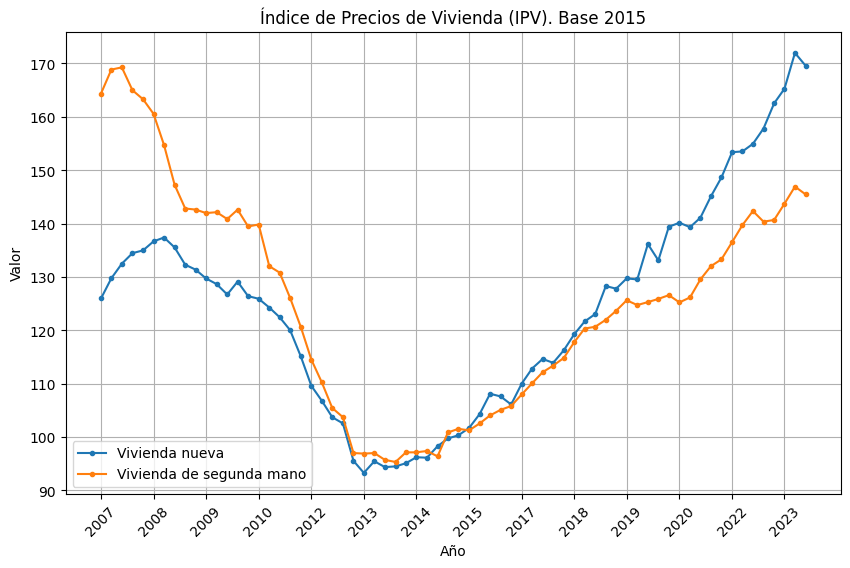

In [293]:
# Crear un gráfico del IPV por Tipo de vivienda
vivienda_nueva = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda nueva']
vivienda_segunda_mano = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda segunda mano']

plt.figure(figsize=(10, 6))
plt.plot(vivienda_nueva['Periodo'], vivienda_nueva['Total'], label='Vivienda nueva', marker='o', markersize=3)
plt.plot(vivienda_segunda_mano['Periodo'], vivienda_segunda_mano['Total'], label='Vivienda de segunda mano', marker='o', markersize=3)


plt.title('Índice de Precios de Vivienda (IPV). Base 2015')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para ajustar el formato del eje X a solo mostrar el año
date_formatter = mdates.DateFormatter('%Y')  
plt.gca().xaxis.set_major_formatter(date_formatter)

# Configurar intervalos y rotación para los ticks del eje X
intervalo = 5
ticks = vivienda_nueva['Periodo'][::intervalo]
plt.xticks(ticks, rotation=45)

plt.legend(loc='best')

plt.savefig("1.2.IPV por tipo .jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

In [294]:
fig = px.line(
    IPV_naci_tip_indice, 
    x='Periodo', 
    y='Total', 
    color='TipoV',  # Separa las líneas por 'TipoV'
    title='Índice de Precios de Vivienda (IPV). Base 2015',
    labels={'Total': 'Valor', 'Periodo': 'Año'},  # Etiquetas de los ejes
    markers=True  # Añadir marcadores
)

# Ajustar las etiquetas del eje x para evitar corte de texto
fig.update_layout(
    xaxis=dict(
        tickangle=45,  # Inclinación de etiquetas
        title='Año'  # Título del eje x
    ),
    yaxis=dict(
        title='Valor'  # Título del eje y
    ),
    legend=dict(
        title='Tipo de Vivienda'  # Título de la leyenda
    )
)

# Guardar la imagen en formato JPG
fig.write_image("grafico_vivienda_plotly.jpg", format='jpg', scale=3)  # Usar 'scale' para mayor calidad/resolución

# Mostrar el gráfico
fig.show()

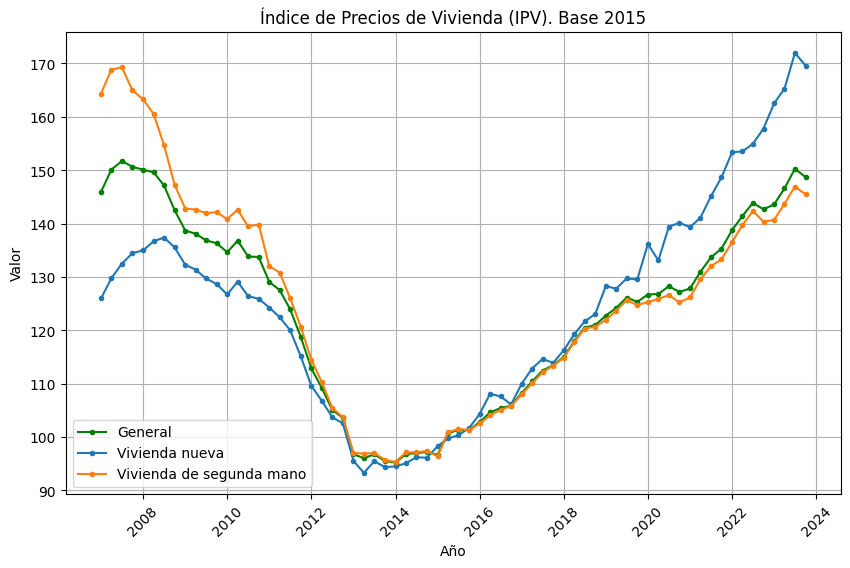

In [295]:
# Filtrar los diferentes tipos de datos
general = IPV_naci_gen_indice
vivienda_nueva = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda nueva']
vivienda_segunda_mano = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda segunda mano']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(general['Periodo'], general['Total'], label='General', marker='o', markersize=3, color='green')
plt.plot(vivienda_nueva['Periodo'], vivienda_nueva['Total'], label='Vivienda nueva', marker='o', markersize=3)
plt.plot(vivienda_segunda_mano['Periodo'], vivienda_segunda_mano['Total'], label='Vivienda de segunda mano', marker='o', markersize=3)

# Configurar el título y los ejes
plt.title('Índice de Precios de Vivienda (IPV). Base 2015')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("1.3. IPV_Global.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

La convergencia entre el índice general de precios de la vivienda (IPV) y la línea que representa la vivienda de segunda mano en la gráfica puede ser resultado de varios factores. Aquí se exploran algunas posibles razones:

### Composición del mercado de vivienda
El índice general del IPV puede estar más influenciado por las viviendas de segunda mano que por las viviendas nuevas, ya que el volumen de viviendas usadas en el mercado es generalmente mayor. Como el índice general es una combinación de ambas, si la proporción de viviendas usadas es considerablemente mayor, el índice general tenderá a seguir esa tendencia.

### Diferencias en el comportamiento de precios
Las viviendas nuevas y las viviendas de segunda mano pueden tener comportamientos de precios distintos debido a varios factores, como costos de construcción, oferta y demanda, ubicaciones, y políticas gubernamentales. Si las viviendas nuevas experimentan fluctuaciones más amplias mientras que las viviendas de segunda mano son más estables, esto podría hacer que el índice general converja hacia las viviendas de segunda mano.

### Fluctuaciones del mercado inmobiliario
Las fluctuaciones del mercado inmobiliario, como cambios en la oferta y la demanda, condiciones económicas generales y tasas de interés, pueden afectar de manera diferente a viviendas nuevas y de segunda mano. Durante períodos de inestabilidad económica, las viviendas de segunda mano pueden ser percibidas como opciones más accesibles, lo que podría atraer a más compradores y hacer que sus precios suban en relación con las viviendas nuevas.

### Preferencias del consumidor
Los cambios en las preferencias del consumidor hacia viviendas de segunda mano debido a su precio más bajo, ubicaciones más establecidas, o menos requisitos de mantenimiento, pueden también contribuir a esta convergencia. Si las viviendas de segunda mano se vuelven más atractivas para los compradores, esto podría aumentar su demanda y acercar sus precios al índice general.

### Conclusión
En resumen, la razón por la que el índice general del IPV se aproxima más a la vivienda de segunda mano que a la vivienda nueva podría ser el resultado de la mayor influencia de las viviendas de segunda mano en el mercado, la estabilidad de sus precios, las fluctuaciones del mercado inmobiliario y las preferencias cambiantes de los consumidores. La convergencia hacia la actualidad refleja la composición y tendencias del mercado inmobiliario durante el período representado en la gráfica.

In [95]:
### IPC acumulado
ipc = pd.read_csv("data/ipc acumulado base 2021.csv", sep= ";")
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Variable1  267 non-null    object
 1   Valor1     267 non-null    object
 2   Variable2  267 non-null    object
 3   Valor2     267 non-null    object
 4   Variable3  267 non-null    object
 5   Valor3     267 non-null    object
 6   PERIODO    267 non-null    object
 7   VALOR      267 non-null    object
dtypes: object(8)
memory usage: 16.8+ KB


In [96]:
ipc["VALOR"] = ipc["VALOR"].str.replace(',', '.').astype(float)
ipc["PERIODO"] = pd.to_datetime(ipc["PERIODO"].str.replace('M', '-'))
ipc

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
0,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2024-03-01,114.674
1,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2024-02-01,113.807
2,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2024-01-01,113.404
3,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2023-12-01,113.308
4,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2023-11-01,113.280
...,...,...,...,...,...,...,...,...
262,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2002-05-01,71.374
263,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2002-04-01,71.118
264,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2002-03-01,70.165
265,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2002-02-01,69.590


In [97]:
ipc = ipc.sort_values(by='PERIODO', ascending=True)


In [98]:
ipc = ipc[ipc['PERIODO'] >= "2007-01-01"]
ipc.reset_index(drop=True, inplace=True)
ipc

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
0,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2007-01-01,81.129
1,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2007-02-01,81.184
2,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2007-03-01,81.800
3,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2007-04-01,82.930
4,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2007-05-01,83.158
...,...,...,...,...,...,...,...,...
202,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2023-11-01,113.280
203,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2023-12-01,113.308
204,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2024-01-01,113.404
205,Tipo de dato,Índice,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2024-02-01,113.807


In [99]:
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Variable1  207 non-null    object        
 1   Valor1     207 non-null    object        
 2   Variable2  207 non-null    object        
 3   Valor2     207 non-null    object        
 4   Variable3  207 non-null    object        
 5   Valor3     207 non-null    object        
 6   PERIODO    207 non-null    datetime64[ns]
 7   VALOR      207 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 13.1+ KB


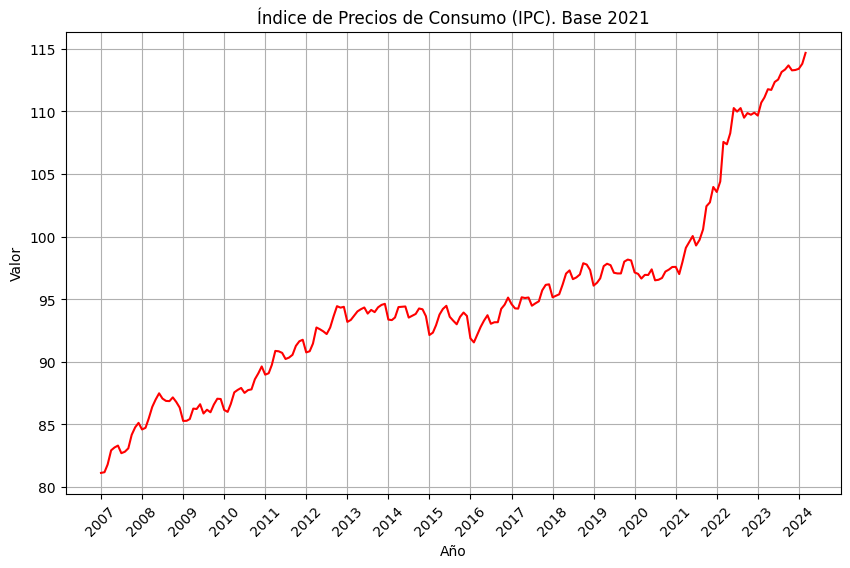

In [101]:
# Crear un gráfico del IPV GENERAL
plt.figure(figsize=(10, 6))
plt.plot(ipc['PERIODO'],ipc['VALOR'], label='Valor', color='red')


plt.title('Índice de Precios de Consumo (IPC). Base 2021')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Establecer el formato para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

intervalo = 12
ticks = ipc['PERIODO'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45)

plt.savefig("1.4_IPC_global.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

In [239]:
### INE Compraventa de viviendas según régimen y estado
ine_trans = pd.read_csv("data/INE_Compraventa de viviendas según régimen y estado.csv", sep= ";")
ine_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74160 entries, 0 to 74159
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total Nacional                    74160 non-null  object 
 1   Comunidades y Ciudades Autónomas  73130 non-null  object 
 2   Provincias                        53560 non-null  object 
 3   Régimen y estado                  74160 non-null  object 
 4   Periodo                           74160 non-null  object 
 5   Total                             74160 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.4+ MB


In [240]:
ine_trans['Total'] = (ine_trans['Total'] * 1000).astype(int)

In [241]:
ine_trans

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
0,Total Nacional,NaN,NaN,Viviendas: Total,2024M02,52796
1,Total Nacional,NaN,NaN,Viviendas: Total,2024M01,54346
2,Total Nacional,NaN,NaN,Viviendas: Total,2023M12,36698
3,Total Nacional,NaN,NaN,Viviendas: Total,2023M11,46888
4,Total Nacional,NaN,NaN,Viviendas: Total,2023M10,45903
...,...,...,...,...,...,...
74155,Total Nacional,19 Melilla,52 Melilla,Vivienda protegida,2007M05,4000
74156,Total Nacional,19 Melilla,52 Melilla,Vivienda protegida,2007M04,2000
74157,Total Nacional,19 Melilla,52 Melilla,Vivienda protegida,2007M03,21000
74158,Total Nacional,19 Melilla,52 Melilla,Vivienda protegida,2007M02,26000


In [242]:
ine_trans["Periodo"] = pd.to_datetime(ine_trans["Periodo"].str.replace('M', '-'))
ine_trans = ine_trans.sort_values(by='Periodo', ascending=True)

In [243]:
ine_trans

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
37079,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda protegida,2007-01-01,73000
23895,Total Nacional,07 Castilla y León,NaN,Viviendas: Total,2007-01-01,4492
24101,Total Nacional,07 Castilla y León,NaN,Vivienda nueva,2007-01-01,1493
24307,Total Nacional,07 Castilla y León,NaN,Vivienda usada,2007-01-01,2999
24513,Total Nacional,07 Castilla y León,NaN,Vivienda libre,2007-01-01,3989
...,...,...,...,...,...,...
13184,Total Nacional,02 Aragón,44 Teruel,Vivienda protegida,2024-02-01,11000
36050,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Viviendas: Total,2024-02-01,456000
35844,Total Nacional,08 Castilla - La Mancha,02 Albacete,Vivienda protegida,2024-02-01,26000
36874,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda protegida,2024-02-01,21000


In [244]:
ine_trans_nacional = ine_trans[ine_trans["Comunidades y Ciudades Autónomas"].isna()]
ine_trans_nacional

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
823,Total Nacional,NaN,NaN,Vivienda libre,2007-01-01,76462
1029,Total Nacional,NaN,NaN,Vivienda protegida,2007-01-01,7251
617,Total Nacional,NaN,NaN,Vivienda usada,2007-01-01,50233
411,Total Nacional,NaN,NaN,Vivienda nueva,2007-01-01,33480
205,Total Nacional,NaN,NaN,Viviendas: Total,2007-01-01,83713
...,...,...,...,...,...,...
412,Total Nacional,NaN,NaN,Vivienda usada,2024-02-01,41268
824,Total Nacional,NaN,NaN,Vivienda protegida,2024-02-01,3763
206,Total Nacional,NaN,NaN,Vivienda nueva,2024-02-01,11528
618,Total Nacional,NaN,NaN,Vivienda libre,2024-02-01,49033


In [245]:
ine_trans_ccaa = ine_trans[ine_trans["Comunidades y Ciudades Autónomas"].notna()]
ine_trans_ccaa

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
37079,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda protegida,2007-01-01,73000
23895,Total Nacional,07 Castilla y León,NaN,Viviendas: Total,2007-01-01,4492
24101,Total Nacional,07 Castilla y León,NaN,Vivienda nueva,2007-01-01,1493
24307,Total Nacional,07 Castilla y León,NaN,Vivienda usada,2007-01-01,2999
24513,Total Nacional,07 Castilla y León,NaN,Vivienda libre,2007-01-01,3989
...,...,...,...,...,...,...
36256,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda nueva,2024-02-01,56000
13184,Total Nacional,02 Aragón,44 Teruel,Vivienda protegida,2024-02-01,11000
36050,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Viviendas: Total,2024-02-01,456000
35844,Total Nacional,08 Castilla - La Mancha,02 Albacete,Vivienda protegida,2024-02-01,26000


In [246]:
ine_trans_nacional["Régimen y estado"].unique()

array(['Vivienda libre', 'Vivienda protegida', 'Vivienda usada',
       'Vivienda nueva', 'Viviendas: Total'], dtype=object)

In [247]:
ine_trans_nac_total = ine_trans_nacional[ine_trans_nacional["Régimen y estado"] == "Viviendas: Total"]
ine_trans_nac_nueva = ine_trans_nacional[ine_trans_nacional["Régimen y estado"] == "Vivienda nueva"]
ine_trans_nac_usada = ine_trans_nacional[ine_trans_nacional["Régimen y estado"] == "Vivienda usada"]


In [248]:
ine_trans_nac_usada

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
617,Total Nacional,NaN,NaN,Vivienda usada,2007-01-01,50233
616,Total Nacional,NaN,NaN,Vivienda usada,2007-02-01,42503
615,Total Nacional,NaN,NaN,Vivienda usada,2007-03-01,43620
614,Total Nacional,NaN,NaN,Vivienda usada,2007-04-01,35483
613,Total Nacional,NaN,NaN,Vivienda usada,2007-05-01,44549
...,...,...,...,...,...,...
416,Total Nacional,NaN,NaN,Vivienda usada,2023-10-01,37056
415,Total Nacional,NaN,NaN,Vivienda usada,2023-11-01,38015
414,Total Nacional,NaN,NaN,Vivienda usada,2023-12-01,29820
413,Total Nacional,NaN,NaN,Vivienda usada,2024-01-01,43397


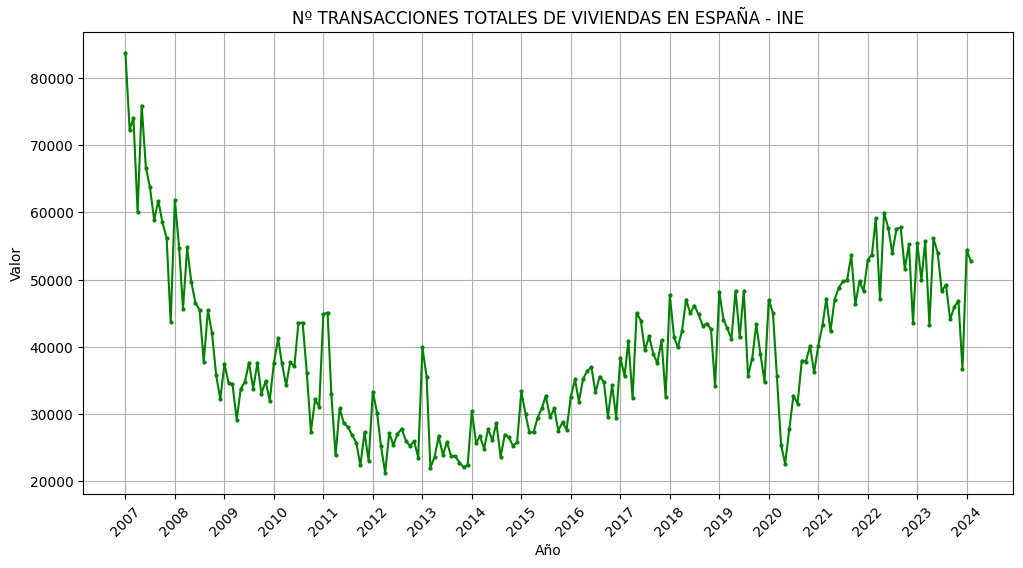

In [249]:
# GRAFICO Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - INE
plt.figure(figsize=(12, 6))
plt.plot(ine_trans_nac_total['Periodo'], ine_trans_nac_total['Total'], label='Total', marker='o', markersize=2, color='green')

plt.title('Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - INE')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

intervalo = 12
ticks = ine_trans_nac_total['Periodo'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45) 
plt.xticks(rotation=45)

plt.savefig("1.5. Nº Transacc viv España.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

In [250]:
fig = px.line(
    ine_trans_nac_total, 
    x='Periodo', 
    y='Total', 
    title='Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - INE',
    labels={'Total': 'Valor', 'Periodo': 'Año'},  # Etiquetas de los ejes
    markers=True  # Añadir marcadores
)

# Ajustar las etiquetas del eje x para evitar corte de texto
fig.update_layout(
    xaxis=dict(
        tickangle=45,  # Inclinación de etiquetas
        title='Año'  # Título del eje x
    ),
    yaxis=dict(
        title='Valor'  # Título del eje y
    ),
    legend=dict(
        
        title='Tipo de Vivienda'  # Título de la leyenda
    )
)

# Guardar la imagen en formato JPG
fig.write_image("1.6.jpg", format='jpg', scale=3)  # Usar 'scale' para mayor calidad/resolución

# Mostrar el gráfico
fig.show()

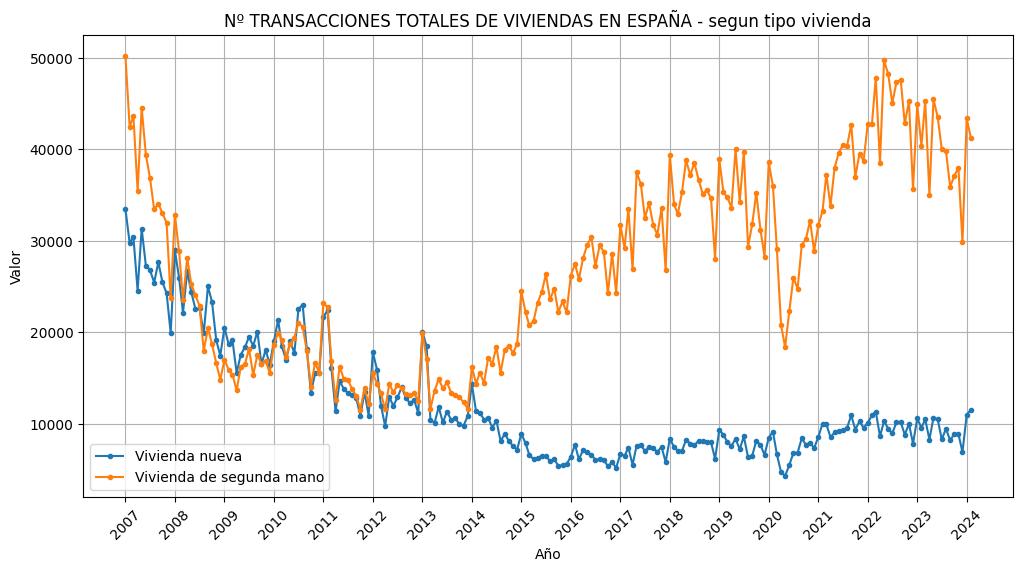

In [251]:
# GRAFICO Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - segun tipo vivienda
plt.figure(figsize=(12, 6))
plt.plot(ine_trans_nac_nueva['Periodo'], ine_trans_nac_nueva['Total'], label='Vivienda nueva', marker='o', markersize=3)
plt.plot(ine_trans_nac_usada['Periodo'], ine_trans_nac_usada['Total'], label='Vivienda de segunda mano', marker='o', markersize=3)


plt.title('Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - segun tipo vivienda')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

intervalo = 12
ticks = ine_trans_nac_total['Periodo'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45) 
plt.xticks(rotation=45)

plt.legend()

plt.savefig("1.7 . Nº Transacc viv España por tipo vivienda.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

## COMPRAVENTA DE VIVIENDAS NUEVAS Y DE SGUNDA MANO - INE

In [286]:

comvent_viv = pd.read_csv("data/compraventas_de_viviendas_nuevas_y_de_segunda_mano_en_lo_que_va_de_año.csv", sep= ";")
comvent_viv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              35 non-null     object 
 1   Periodo          18 non-null     object 
 2   De segunda mano  18 non-null     float64
 3   Nuevas           18 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [287]:
comvent_viv = comvent_viv.iloc[:17,:]
comvent_viv.reset_index(drop=True, inplace=True)


In [288]:
comvent_viv["Año"] = pd.to_datetime(comvent_viv["Año"])
comvent_viv.info()
comvent_viv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Año              17 non-null     datetime64[ns]
 1   Periodo          17 non-null     object        
 2   De segunda mano  17 non-null     float64       
 3   Nuevas           17 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 672.0+ bytes


,Año,Periodo,De segunda mano,Nuevas
0,2007-01-01,Febrero,92.736,63.264
1,2008-01-01,Febrero,61.700,54.908
2,2009-01-01,Febrero,32.878,39.175
3,2010-01-01,Febrero,38.567,40.350
4,2011-01-01,Febrero,45.921,44.060
5,2012-01-01,Febrero,29.895,33.722
6,2013-01-01,Febrero,36.964,38.491
7,2014-01-01,Febrero,30.565,25.648
8,2015-01-01,Febrero,46.653,16.758
9,2016-01-01,Febrero,53.681,14.062


In [289]:
comvent_viv["De segunda mano"] = comvent_viv["De segunda mano"].astype(str).str.replace('.', '').astype(int)

In [290]:
comvent_viv["De segunda mano"] = comvent_viv["De segunda mano"].replace(617, 61700)


In [291]:
comvent_viv["Nuevas"] = comvent_viv["Nuevas"].astype(str).str.replace('.', '').astype(int)

In [292]:
comvent_viv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Año              17 non-null     datetime64[ns]
 1   Periodo          17 non-null     object        
 2   De segunda mano  17 non-null     int64         
 3   Nuevas           17 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 672.0+ bytes


In [293]:
comvent_viv["Total"] = comvent_viv["Nuevas"] + comvent_viv["De segunda mano"]

In [294]:
comvent_viv

,Año,Periodo,De segunda mano,Nuevas,Total
0,2007-01-01,Febrero,92736,63264,156000
1,2008-01-01,Febrero,61700,54908,116608
2,2009-01-01,Febrero,32878,39175,72053
3,2010-01-01,Febrero,38567,4035,42602
4,2011-01-01,Febrero,45921,4406,50327
5,2012-01-01,Febrero,29895,33722,63617
6,2013-01-01,Febrero,36964,38491,75455
7,2014-01-01,Febrero,30565,25648,56213
8,2015-01-01,Febrero,46653,16758,63411
9,2016-01-01,Febrero,53681,14062,67743


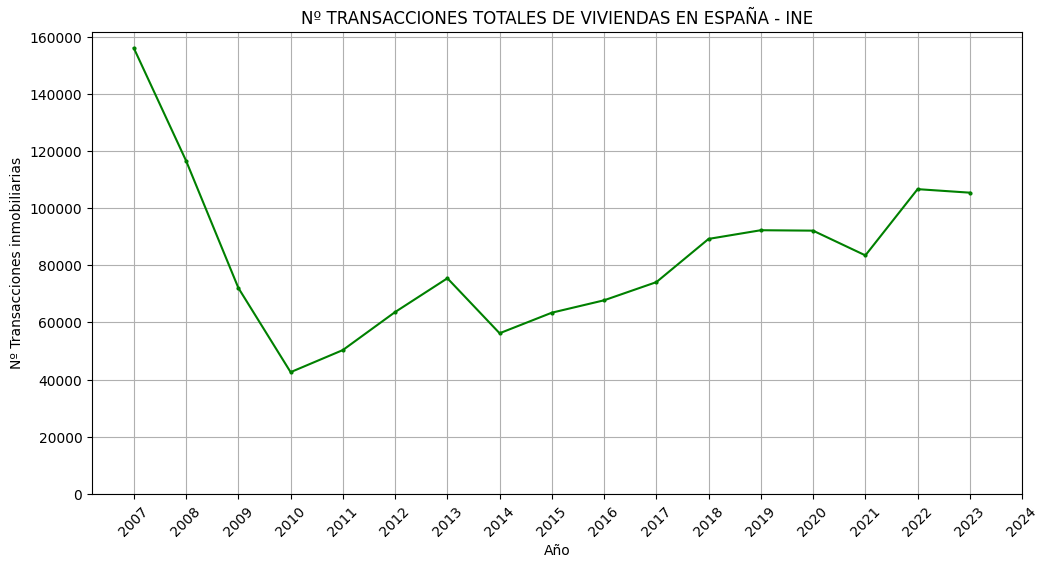

In [295]:
# GRAFICO Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - INE
plt.figure(figsize=(12, 6))
plt.plot(comvent_viv["Año"], comvent_viv["Total"] , label='Total', marker='o', markersize=2, color='green')


plt.title('Nº TRANSACCIONES TOTALES DE VIVIENDAS EN ESPAÑA - INE')
plt.xlabel('Año')
plt.ylabel('Nº Transacciones inmobiliarias')
plt.ylim(bottom = 0)
plt.grid(True)

date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

intervalo = 12
ticks = ine_trans_nac_total['Periodo'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45) 
plt.xticks(rotation=45)

plt.savefig("1.55. Nº Transacc viv España.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

In [296]:
df = comvent_viv

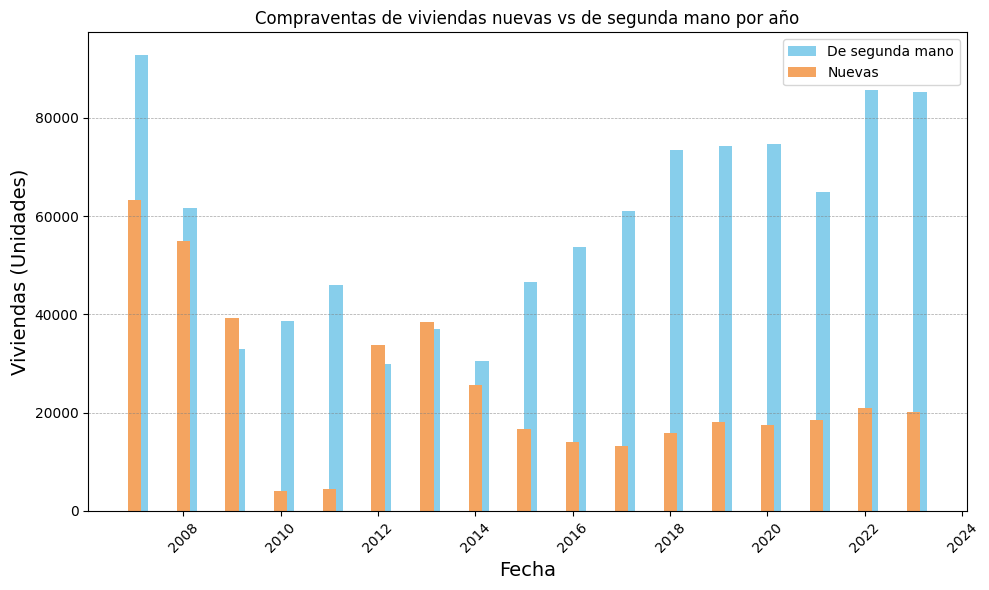

In [297]:

# Configuramos el tamaño de la figura para que coincida con la imagen original
plt.figure(figsize=(10,6 ))

# Dibujamos las barras para viviendas de segunda mano y nuevas

plt.bar(df['Año'], df['De segunda mano'], width=100, color='skyblue', label='De segunda mano', align='edge')
plt.bar(df['Año'], df['Nuevas'], width=100, color='sandybrown', label='Nuevas', align="center")

# Añadimos títulos y etiquetas
plt.title('Compraventas de viviendas nuevas vs de segunda mano por año')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Viviendas (Unidades)', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

plt.xticks(rotation=45)

# Ajustamos los márgenes y mostramos la gráfica
plt.tight_layout()
plt.savefig("1.77 . Nº Transacc viv España por tipo vivienda.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()

## EURIBOR - BANCO DE ESPAÑA


In [269]:

euribor = pd.read_csv("data/evolucion_del_euribor_mensual.csv", sep= ";")
euribor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Año      313 non-null    object
 1   Periodo  303 non-null    object
 2   Euribor  303 non-null    object
dtypes: object(3)
memory usage: 7.6+ KB


In [270]:
euribor = euribor.iloc[96:303,:]
euribor.reset_index(drop=True, inplace=True)


In [271]:
euribor

,Año,Periodo,Euribor
0,2007,Enero,"4,06"
1,2007,Febrero,"4,09"
2,2007,Marzo,"4,11"
3,2007,Abril,"4,25"
4,2007,Mayo,"4,37"
...,...,...,...
202,2023,Noviembre,"4,02"
203,2023,Diciembre,"3,68"
204,2024,Enero,"3,61"
205,2024,Febrero,"3,67"


In [272]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [273]:
euribor['Fecha'] = pd.to_datetime(euribor['Año'].astype(str) + '-' + euribor['Periodo'], format="%Y-%B", errors='coerce')

In [274]:
euribor

,Año,Periodo,Euribor,Fecha
0,2007,Enero,"4,06",2007-01-01
1,2007,Febrero,"4,09",2007-02-01
2,2007,Marzo,"4,11",2007-03-01
3,2007,Abril,"4,25",2007-04-01
4,2007,Mayo,"4,37",2007-05-01
...,...,...,...,...
202,2023,Noviembre,"4,02",2023-11-01
203,2023,Diciembre,"3,68",2023-12-01
204,2024,Enero,"3,61",2024-01-01
205,2024,Febrero,"3,67",2024-02-01


In [275]:
euribor["Euribor"] = euribor["Euribor"].str.replace(',', '.').astype(float)
euribor

,Año,Periodo,Euribor,Fecha
0,2007,Enero,4.06,2007-01-01
1,2007,Febrero,4.09,2007-02-01
2,2007,Marzo,4.11,2007-03-01
3,2007,Abril,4.25,2007-04-01
4,2007,Mayo,4.37,2007-05-01
...,...,...,...,...
202,2023,Noviembre,4.02,2023-11-01
203,2023,Diciembre,3.68,2023-12-01
204,2024,Enero,3.61,2024-01-01
205,2024,Febrero,3.67,2024-02-01


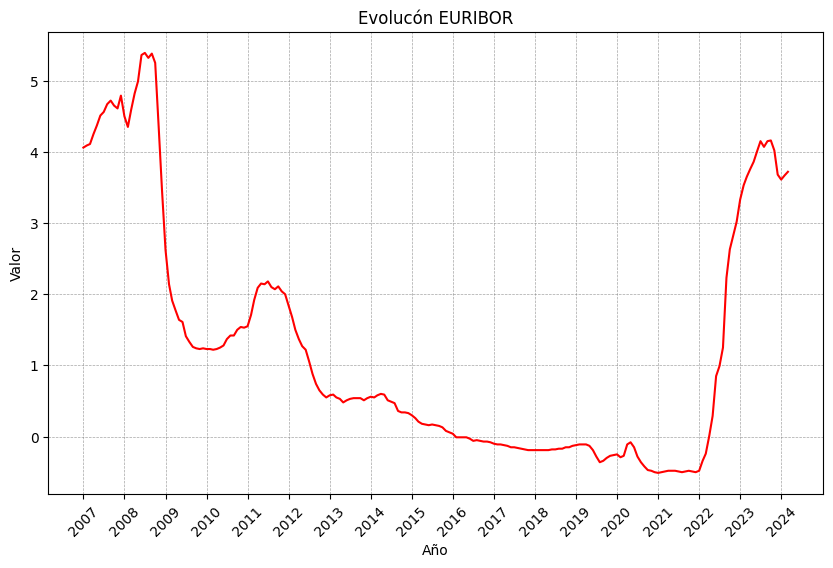

In [277]:
# EURIBOR
plt.figure(figsize=(10, 6))
plt.plot(euribor["Fecha"],euribor["Euribor"], label='Valor', color='red')


plt.title('Evolucón EURIBOR')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid( linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Establecer el formato para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

intervalo = 12
ticks = ipc['PERIODO'][::intervalo]  # Ajustar según el intervalo
plt.xticks(ticks, rotation=45)

plt.savefig("1.22 EURIBOR.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()

## precio euro metro 2 - CONSEJO GENERAL DEL NOTARIADO

In [166]:
precio = pd.read_csv("data/evolucion_del_precio_de_la_vivienda_los_ultimos_10_años.csv", sep= ";")
precio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        130 non-null    object
 1   Periodo    120 non-null    object
 2   euros /m2  120 non-null    object
dtypes: object(3)
memory usage: 3.3+ KB


In [167]:
precio.iloc[:120,:]

,Año,Periodo,euros /m2
0,2014,Marzo,"1.298,75"
1,2014,Abril,"1.236,61"
2,2014,Mayo,"1.257,8"
3,2014,Junio,"1.263,14"
4,2014,Julio,"1.277,4"
...,...,...,...
115,2023,Octubre,1.644
116,2023,Noviembre,1.623
117,2023,Diciembre,1.687
118,2024,Enero,1.706


In [168]:
precio = precio.iloc[:120,:]
precio.reset_index(drop=True, inplace=True)

In [169]:
precio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        120 non-null    object
 1   Periodo    120 non-null    object
 2   euros /m2  120 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [170]:
precio['Fecha'] = pd.to_datetime(precio['Año'].astype(str) + '-' + precio['Periodo'], format="%Y-%B", errors='coerce')

In [171]:
precio

,Año,Periodo,euros /m2,Fecha
0,2014,Marzo,"1.298,75",2014-03-01
1,2014,Abril,"1.236,61",2014-04-01
2,2014,Mayo,"1.257,8",2014-05-01
3,2014,Junio,"1.263,14",2014-06-01
4,2014,Julio,"1.277,4",2014-07-01
...,...,...,...,...
115,2023,Octubre,1.644,2023-10-01
116,2023,Noviembre,1.623,2023-11-01
117,2023,Diciembre,1.687,2023-12-01
118,2024,Enero,1.706,2024-01-01


In [172]:
precio["euros /m2"] = precio["euros /m2"].str.replace('.', '').str.replace(',', '.').astype(float)
precio

,Año,Periodo,euros /m2,Fecha
0,2014,Marzo,1298.75,2014-03-01
1,2014,Abril,1236.61,2014-04-01
2,2014,Mayo,1257.80,2014-05-01
3,2014,Junio,1263.14,2014-06-01
4,2014,Julio,1277.40,2014-07-01
...,...,...,...,...
115,2023,Octubre,1644.00,2023-10-01
116,2023,Noviembre,1623.00,2023-11-01
117,2023,Diciembre,1687.00,2023-12-01
118,2024,Enero,1706.00,2024-01-01


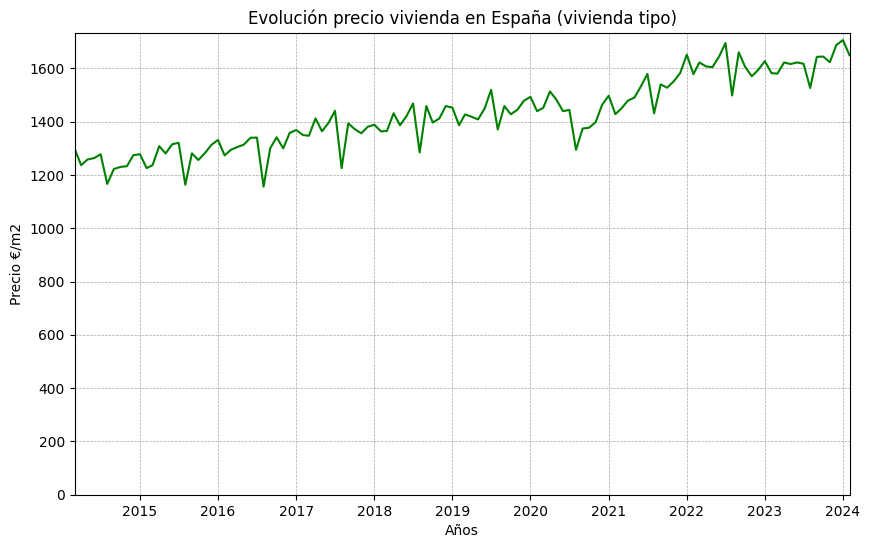

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(precio['Fecha'], precio["euros /m2"], label='Precio', color='green')

plt.title('Evolución precio vivienda en España (vivienda tipo)')
plt.xlabel('Años')
plt.ylabel('Precio €/m2')
plt.ylabel('Precio €/m2')
plt.ylim(bottom = 0)
plt.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Aplicar DateFormatter para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Para mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().autoscale(axis='x', tight=True)

# Guardar la figura con las configuraciones adecuadas
plt.savefig("2.1.PRECIO VIVIENDA - cgn.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

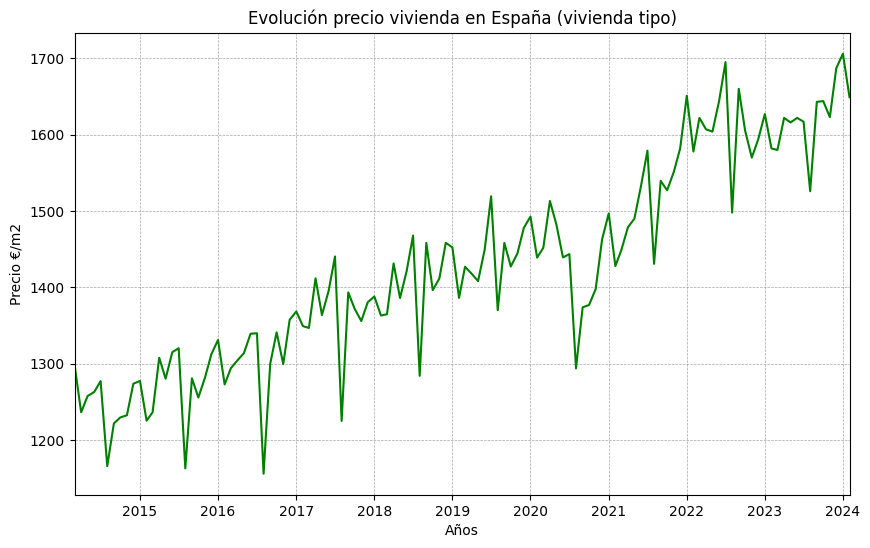

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(precio['Fecha'], precio["euros /m2"], label='Precio', color='green')

plt.title('Evolución precio vivienda en España (vivienda tipo)')
plt.xlabel('Años')
plt.ylabel('Precio €/m2')
plt.ylabel('Precio €/m2')
plt.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Aplicar DateFormatter para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Para mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().autoscale(axis='x', tight=True)

# Guardar la figura con las configuraciones adecuadas
plt.savefig("2.2.PRECIO VIVIENDA -ampliado.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## TIPOS SINTETICOS DE INTERES EN ESPAÑA



Los tipos sintéticos de interés se refieren a tasas de interés promedio calculadas a partir de las nuevas operaciones realizadas por las entidades de crédito y los establecimientos financieros de crédito. Son útiles para entender el comportamiento de las tasas de interés y permiten obtener un panorama más amplio del mercado financiero.

Aquí hay una descripción general de lo que estos tipos incluyen y para qué se utilizan:

Definición de tipos sintéticos de interés: Estos tipos se calculan como un promedio ponderado de las tasas de interés de las nuevas operaciones realizadas por instituciones financieras, como bancos, cajas de ahorro y otros establecimientos de crédito. Se utilizan para obtener una visión general de las tendencias en las tasas de interés.
Uso de los tipos sintéticos de interés: Proporcionan información clave para los analistas financieros y las autoridades monetarias. Ayudan a evaluar la evolución del mercado crediticio y el impacto de la política monetaria en las tasas de interés.
Tipos de operaciones incluidas: Los tipos sintéticos de interés pueden incluir diversas operaciones, como préstamos hipotecarios, créditos personales, financiamientos para empresas, entre otros. La combinación de estas diferentes operaciones permite obtener un promedio representativo.
Relevancia para la toma de decisiones: Los tipos sintéticos de interés son utilizados por los bancos centrales y otras autoridades regulatorias para monitorear la salud del sistema financiero y ajustar las políticas según sea necesario. También son útiles para las instituciones financieras al planificar sus estrategias de inversión y préstamo.
En resumen, los tipos sintéticos de interés de nuevas operaciones de entidades de crédito y establecimientos financieros de crédito son una herramienta importante para entender las tendencias y el comportamiento del mercado crediticio. Se usan para guiar las decisiones tanto de las autoridades regulatorias como de las instituciones financieras.

In [244]:
### Tipos sinteticos de interes en españa
tsi = pd.read_csv("data/tsi.csv", sep= ",")
tsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateTime                    254 non-null    object 
 1   Préstamos y créditos (TAE)  254 non-null    float64
 2   Depósitos (TEDR)            254 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.1+ KB


In [245]:
tsi

,DateTime,Préstamos y créditos (TAE),Depósitos (TEDR)
0,2003-01,4.86,1.58
1,2003-02,4.76,1.51
2,2003-03,4.58,1.43
3,2003-04,4.54,1.34
4,2003-05,4.46,1.33
...,...,...,...
249,2023-10,5.74,0.59
250,2023-11,5.43,0.63
251,2023-12,5.37,0.67
252,2024-01,5.57,0.68


In [246]:
tsi['DateTime'] = pd.to_datetime(tsi['DateTime'], format='%Y-%m')
tsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateTime                    254 non-null    datetime64[ns]
 1   Préstamos y créditos (TAE)  254 non-null    float64       
 2   Depósitos (TEDR)            254 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.1 KB


In [247]:
tsi

,DateTime,Préstamos y créditos (TAE),Depósitos (TEDR)
0,2003-01-01,4.86,1.58
1,2003-02-01,4.76,1.51
2,2003-03-01,4.58,1.43
3,2003-04-01,4.54,1.34
4,2003-05-01,4.46,1.33
...,...,...,...
249,2023-10-01,5.74,0.59
250,2023-11-01,5.43,0.63
251,2023-12-01,5.37,0.67
252,2024-01-01,5.57,0.68


In [248]:
tsi = tsi[tsi['DateTime'] >= "2007-01"]
tsi.reset_index(drop=True, inplace=True)
tsi

,DateTime,Préstamos y créditos (TAE),Depósitos (TEDR)
0,2007-01-01,5.22,1.96
1,2007-02-01,5.29,2.00
2,2007-03-01,5.38,2.10
3,2007-04-01,5.43,2.18
4,2007-05-01,5.48,2.19
...,...,...,...
201,2023-10-01,5.74,0.59
202,2023-11-01,5.43,0.63
203,2023-12-01,5.37,0.67
204,2024-01-01,5.57,0.68


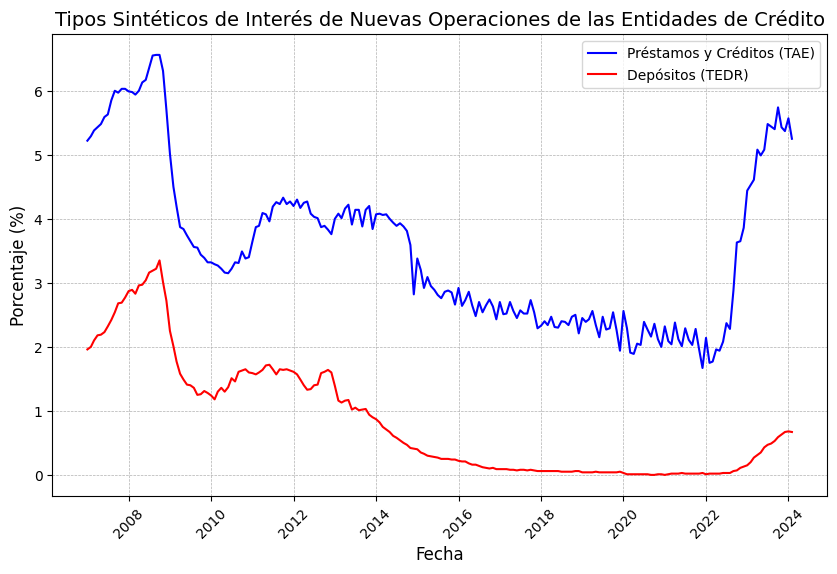

In [250]:

x = tsi['DateTime']
y1 = tsi['Préstamos y créditos (TAE)']
y2 = tsi['Depósitos (TEDR)']


plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Préstamos y Créditos (TAE)', color='blue')
plt.plot(x, y2, label='Depósitos (TEDR)', color='red')


plt.title('Tipos Sintéticos de Interés de Nuevas Operaciones de las Entidades de Crédito', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)


plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.savefig("1.8 Evolucion tipos de interes.jpg", format='jpg', dpi=600, bbox_inches='tight')

plt.show()  

In [77]:
import plotly.graph_objects as go

In [81]:
# Crear el gráfico con líneas y sombreado en Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=tsi['DateTime'], y=tsi['Préstamos y créditos (TAE)'], mode='lines+markers', name='Préstamos y Créditos (TAE)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=tsi['DateTime'], y=tsi['Depósitos (TEDR)'], mode='lines+markers', name='Depósitos (TEDR)', line=dict(color='red')))

# Sombreado entre las dos líneas
fig.add_trace(go.Scatter(x=tsi['DateTime'], y=tsi['Préstamos y créditos (TAE)'], fill='tonexty', fillcolor='grey', mode='none', name='Sombreado'))

# Configurar el diseño y títulos
fig.update_layout(
    title='Tipos Sintéticos de Interés de Nuevas Operaciones de las Entidades de Crédito y Establecimientos Financieros',
    xaxis_title='Fecha',
    yaxis_title='Porcentaje (%)',
    legend_title='Tipo de Interés',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()  # Mostrar el gráfico en Plotly

## Índices de precios de materiales, nacional de la mano de obra y de componentes de transporte de viajeros por carretera. 

Los índices de precios de materiales de construcción, junto con el índice nacional de la mano de obra, constituyen los componentes que intervienen en las fórmulas tipo para la revisión de precios de los contratos de las Administraciones Públicas.

In [264]:
mmpp = pd.read_csv("data/INE - INDICE PRECIO MATERIALES Y OBRA.csv", sep= ";")
mmpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Materiales  2070 non-null   object
 1   Periodo     2070 non-null   object
 2   Total       2070 non-null   object
dtypes: object(3)
memory usage: 48.6+ KB


In [265]:
#como siempre que sacamos datos del INE, pasamos la columna Periodo a DataTime

mmpp["Periodo"] = pd.to_datetime(mmpp["Periodo"].str.replace('M', '-'), format='%Y-%m')
mmpp["Total"] = mmpp["Total"].str.replace(',', '.').astype(float)
mmpp

,Materiales,Periodo,Total
0,Aluminio,2023-06-01,143.269
1,Aluminio,2023-05-01,145.530
2,Aluminio,2023-04-01,148.582
3,Aluminio,2023-03-01,146.918
4,Aluminio,2023-02-01,151.785
...,...,...,...
2065,Materiales explosivos,2012-05-01,99.275
2066,Materiales explosivos,2012-04-01,101.168
2067,Materiales explosivos,2012-03-01,100.365
2068,Materiales explosivos,2012-02-01,99.559


In [266]:
mmpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Materiales  2070 non-null   object        
 1   Periodo     2070 non-null   datetime64[ns]
 2   Total       2070 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 48.6+ KB


In [267]:
mmpp["Materiales"].unique()

array(['Aluminio', 'Materiales bituminosos', 'Cemento', 'Energía',
       'Focos y luminarias', 'Materiales cerámicos', 'Madera',
       'Productos plásticos', 'Productos quimicos', 'Aridos y rocas',
       'Materiales siderúrgicos', 'Materiales electrónicos', 'Cobre',
       'Vidrio', 'Materiales explosivos'], dtype=object)

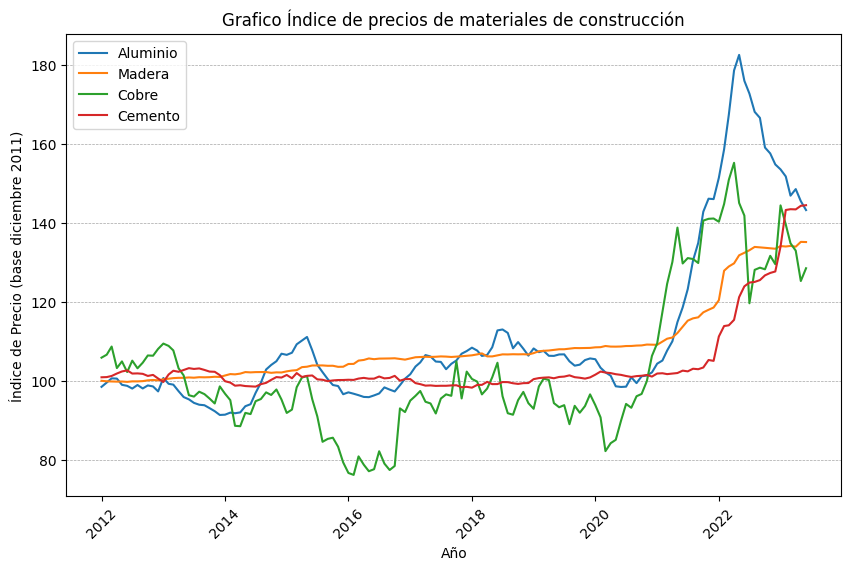

In [279]:

aluminio = mmpp[mmpp['Materiales'] == 'Aluminio']
madera = mmpp[mmpp['Materiales'] == 'Madera']
cobre = mmpp[mmpp['Materiales'] == 'Cobre']
cemento = mmpp[mmpp['Materiales'] == 'Cemento']

plt.figure(figsize=(10, 6))
plt.plot(aluminio['Periodo'], aluminio['Total'], label='Aluminio')
plt.plot(madera['Periodo'], madera['Total'], label='Madera')
plt.plot(cobre['Periodo'], cobre['Total'], label='Cobre')
plt.plot(cemento['Periodo'], cemento['Total'], label='Cemento')

plt.title('Grafico Índice de precios de materiales de construcción')
plt.xlabel('Año')
plt.ylabel('Índice de Precio (base diciembre 2011)')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

date_formatter = mdates.DateFormatter('%Y')  # Mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)  

plt.legend()  
plt.savefig("1.9 Indice MMPP.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()  


 Esto se debe, en parte, a que la guerra en Ucrania y los costes de la energía han disparado el precio de las materias primas.

## DATOS DE COMUNIDAD VALENCIANA

In [56]:
IPV_ccaa["CCAA"].unique()

array(['09 Cataluña', '07 Castilla y León', '06 Cantabria', '05 Canarias',
       '08 Castilla - La Mancha', '10 Comunitat Valenciana', '02 Aragón',
       '01 Andalucía', '04 Balears, Illes', '03 Asturias, Principado de',
       '17 Rioja, La', '16 País Vasco', '15 Navarra, Comunidad Foral de',
       '19 Melilla', '18 Ceuta', '12 Galicia', '11 Extremadura',
       '14 Murcia, Región de', '13 Madrid, Comunidad de'], dtype=object)

In [57]:
ipv_cv = IPV_ccaa[IPV_ccaa["CCAA"] == '10 Comunitat Valenciana']
ipv_cv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 57 to 16171
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Total Nacional  816 non-null    object        
 1   CCAA            816 non-null    object        
 2   TipoV           816 non-null    object        
 3   Comparador      816 non-null    object        
 4   Periodo         816 non-null    datetime64[ns]
 5   Total           816 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 44.6+ KB


In [58]:
ipv_cv["Total"] = ipv_cv["Total"].str.replace(',', '.').astype(float)
ipv_cv = ipv_cv[ipv_cv["Comparador"] == 'Índice']
ipv_cv

,Total Nacional,CCAA,TipoV,Comparador,Periodo,Total
57,Nacional,10 Comunitat Valenciana,General,Índice,2007-01-01,137.102
199,Nacional,10 Comunitat Valenciana,Vivienda segunda mano,Índice,2007-01-01,151.152
203,Nacional,10 Comunitat Valenciana,Vivienda nueva,Índice,2007-01-01,121.972
358,Nacional,10 Comunitat Valenciana,Vivienda nueva,Índice,2007-04-01,125.997
371,Nacional,10 Comunitat Valenciana,General,Índice,2007-04-01,141.929
...,...,...,...,...,...,...
16009,Nacional,10 Comunitat Valenciana,Vivienda nueva,Índice,2023-07-01,164.250
16032,Nacional,10 Comunitat Valenciana,Vivienda segunda mano,Índice,2023-07-01,134.801
16159,Nacional,10 Comunitat Valenciana,Vivienda segunda mano,Índice,2023-10-01,133.746
16167,Nacional,10 Comunitat Valenciana,Vivienda nueva,Índice,2023-10-01,160.568


In [30]:
ine_trans_ccaa

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Régimen y estado,Periodo,Total
37079,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda protegida,2007-01-01,73.000
23895,Total Nacional,07 Castilla y León,NaN,Viviendas: Total,2007-01-01,4.492
24101,Total Nacional,07 Castilla y León,NaN,Vivienda nueva,2007-01-01,1.493
24307,Total Nacional,07 Castilla y León,NaN,Vivienda usada,2007-01-01,2.999
24513,Total Nacional,07 Castilla y León,NaN,Vivienda libre,2007-01-01,3.989
...,...,...,...,...,...,...
36256,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Vivienda nueva,2024-02-01,56.000
13184,Total Nacional,02 Aragón,44 Teruel,Vivienda protegida,2024-02-01,11.000
36050,Total Nacional,08 Castilla - La Mancha,13 Ciudad Real,Viviendas: Total,2024-02-01,456.000
35844,Total Nacional,08 Castilla - La Mancha,02 Albacete,Vivienda protegida,2024-02-01,26.000


In [38]:
ine_trans_ccaa.rename(columns={'Comunidades y Ciudades Autónomas': 'CCAA'}, inplace=True)
ine_trans_ccaa["CCAA"].unique()[-2]

'10 Comunitat Valenciana'

In [41]:
transviv_cv = ine_trans_ccaa[ine_trans_ccaa["CCAA"] == '10 Comunitat Valenciana']
transviv_cv

,Total Nacional,CCAA,Provincias,Régimen y estado,Periodo,Total
45525,Total Nacional,10 Comunitat Valenciana,NaN,Viviendas: Total,2007-01-01,11.518
45731,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda nueva,2007-01-01,3.967
45937,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda usada,2007-01-01,7.551
46143,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda libre,2007-01-01,10.181
46349,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda protegida,2007-01-01,1.337
...,...,...,...,...,...,...
48410,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Viviendas: Total,2024-02-01,3.405
48204,Total Nacional,10 Comunitat Valenciana,12 Castellón/Castelló,Vivienda protegida,2024-02-01,24.000
47998,Total Nacional,10 Comunitat Valenciana,12 Castellón/Castelló,Vivienda libre,2024-02-01,1.048
47792,Total Nacional,10 Comunitat Valenciana,12 Castellón/Castelló,Vivienda usada,2024-02-01,823.000


In [42]:
transviv_cv_total = transviv_cv[transviv_cv["Provincias"].isna()]

In [43]:
transviv_cv_total

,Total Nacional,CCAA,Provincias,Régimen y estado,Periodo,Total
45525,Total Nacional,10 Comunitat Valenciana,NaN,Viviendas: Total,2007-01-01,11.518
45731,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda nueva,2007-01-01,3.967
45937,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda usada,2007-01-01,7.551
46143,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda libre,2007-01-01,10.181
46349,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda protegida,2007-01-01,1.337
...,...,...,...,...,...,...
46144,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda protegida,2024-02-01,653.000
45938,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda libre,2024-02-01,8.501
45732,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda usada,2024-02-01,7.533
45526,Total Nacional,10 Comunitat Valenciana,NaN,Vivienda nueva,2024-02-01,1.621


In [44]:
transviv_valencia = transviv_cv[transviv_cv["Provincias"] == "46 Valencia/València"]    
transviv_valencia

,Total Nacional,CCAA,Provincias,Régimen y estado,Periodo,Total
48615,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Viviendas: Total,2007-01-01,4.399
48821,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda nueva,2007-01-01,1.239
49027,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda usada,2007-01-01,3.160
49233,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda libre,2007-01-01,3.643
49439,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda protegida,2007-01-01,756.000
...,...,...,...,...,...,...
49234,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda protegida,2024-02-01,389.000
49028,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda libre,2024-02-01,3.016
48822,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda usada,2024-02-01,2.847
48410,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Viviendas: Total,2024-02-01,3.405


In [46]:
#ahora ya tenemos 3 data sets de la comunidad valenciana 
# INDICE DE PRECIOS DE LA  VIVIENDA EN LA COMUNIDAD VALENCIANA 
ipv_cv

#Nº TRANSACCIONES TOTALES DE VIVIENDAS EN Comunidad Valenciana - segun tipo vivienda
transviv_cv_total

#Nº TRANSACCIONES TOTALES DE VIVIENDAS EN LA PROVINCIA DE VALENCIA- segun tipo vivienda
transviv_valencia

,Total Nacional,CCAA,Provincias,Régimen y estado,Periodo,Total
48615,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Viviendas: Total,2007-01-01,4.399
48821,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda nueva,2007-01-01,1.239
49027,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda usada,2007-01-01,3.160
49233,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda libre,2007-01-01,3.643
49439,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda protegida,2007-01-01,756.000
...,...,...,...,...,...,...
49234,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda protegida,2024-02-01,389.000
49028,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda libre,2024-02-01,3.016
48822,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Vivienda usada,2024-02-01,2.847
48410,Total Nacional,10 Comunitat Valenciana,46 Valencia/València,Viviendas: Total,2024-02-01,3.405


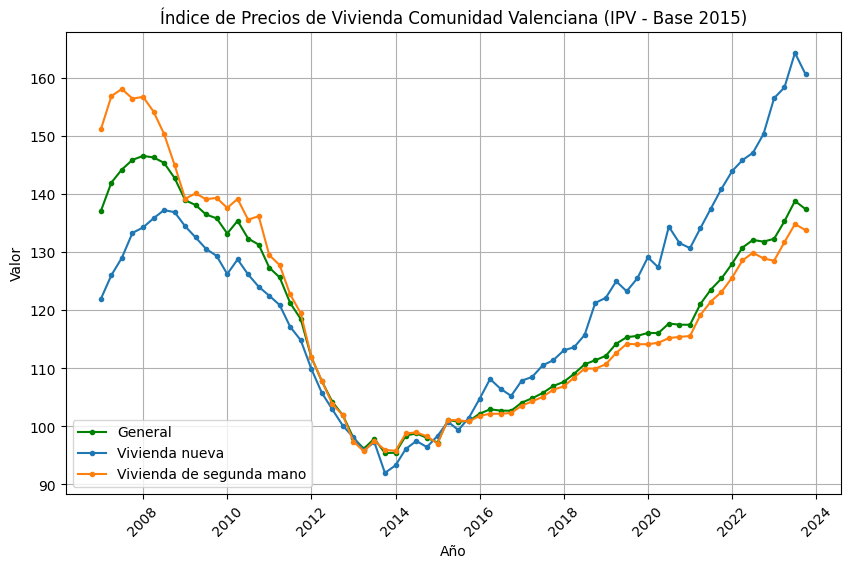

In [62]:
# Filtrar los diferentes tipos de datos
general = ipv_cv[ipv_cv['TipoV'] == 'General']
vivienda_nueva = ipv_cv[ipv_cv['TipoV'] == 'Vivienda nueva']
vivienda_segunda_mano = ipv_cv[ipv_cv['TipoV'] == 'Vivienda segunda mano']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(general['Periodo'], general['Total'], label='General', marker='o', markersize=3, color='green')
plt.plot(vivienda_nueva['Periodo'], vivienda_nueva['Total'], label='Vivienda nueva', marker='o', markersize=3)
plt.plot(vivienda_segunda_mano['Periodo'], vivienda_segunda_mano['Total'], label='Vivienda de segunda mano', marker='o', markersize=3)

# Configurar el título y los ejes
plt.title('Índice de Precios de Vivienda Comunidad Valenciana (IPV - Base 2015)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("3.1 IPV C VALENCIANA", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

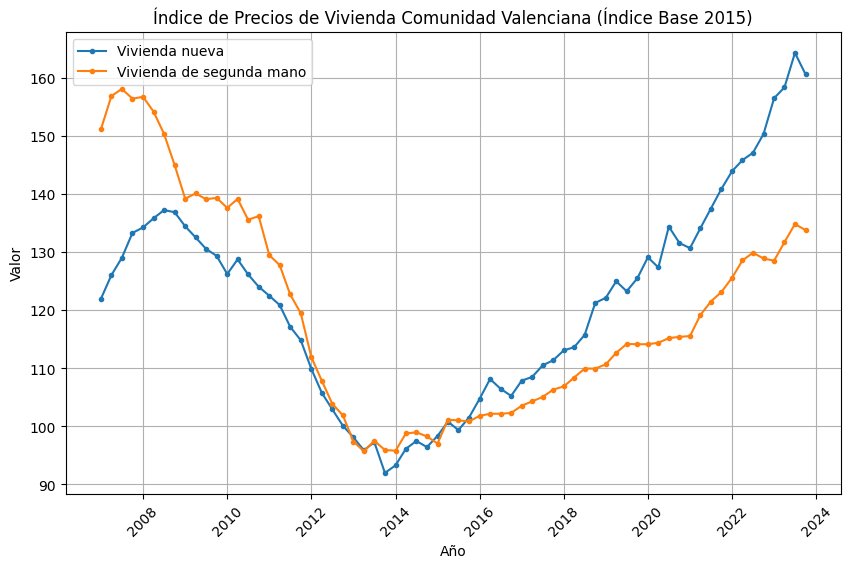

In [86]:
# Filtrar los diferentes tipos de datos

vivienda_nueva = ipv_cv[ipv_cv['TipoV'] == 'Vivienda nueva']
vivienda_segunda_mano = ipv_cv[ipv_cv['TipoV'] == 'Vivienda segunda mano']

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.plot(vivienda_nueva['Periodo'], vivienda_nueva['Total'], label='Vivienda nueva', marker='o', markersize=3)
plt.plot(vivienda_segunda_mano['Periodo'], vivienda_segunda_mano['Total'], label='Vivienda de segunda mano', marker='o', markersize=3)

# Configurar el título y los ejes
plt.title('Índice de Precios de Vivienda Comunidad Valenciana (Índice Base 2015)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("3.2 IPV C VALENCIANA", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

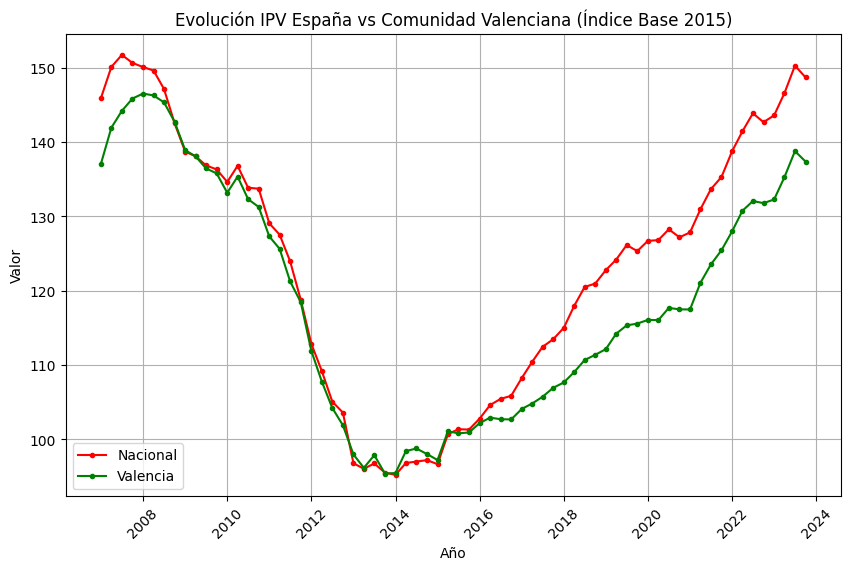

In [91]:
# Filtrar los diferentes tipos de datos
general = IPV_naci_gen_indice
valencia = ipv_cv[ipv_cv['TipoV'] == 'General']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(general['Periodo'], general['Total'], label='Nacional', marker='o', markersize=3,color = "red")
plt.plot(valencia['Periodo'], valencia['Total'], label='Valencia', marker='o', markersize=3, color = "green")

# Configurar el título y los ejes
plt.title('Evolución IPV España vs Comunidad Valenciana (Índice Base 2015)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("3.3 Evolución IPV España vs Comunidad Valenciana (IPV - Base 2015).jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

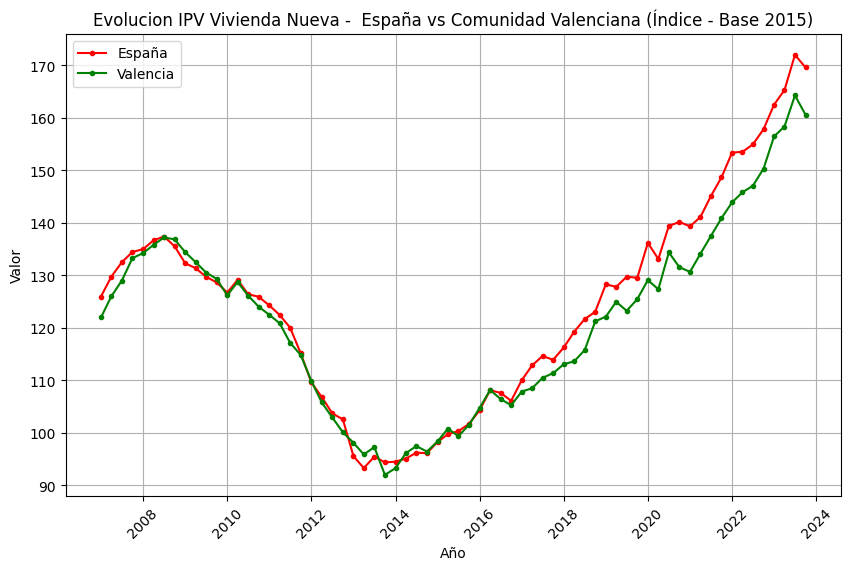

In [93]:
# Filtrar los diferentes tipos de datos
general = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda nueva']
valencia = ipv_cv[ipv_cv['TipoV'] == 'Vivienda nueva']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(general['Periodo'], general['Total'], label='España', marker='o', markersize=3, color = "red")
plt.plot(valencia['Periodo'], valencia['Total'], label='Valencia', marker='o', markersize=3, color = "green")

# Configurar el título y los ejes
plt.title('Evolucion IPV Vivienda Nueva -  España vs Comunidad Valenciana (Índice - Base 2015)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("3.4 Evolucion IPV Vivienda Nueva -  España vs Comunidad Valenciana (Índice - Base 2015).jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

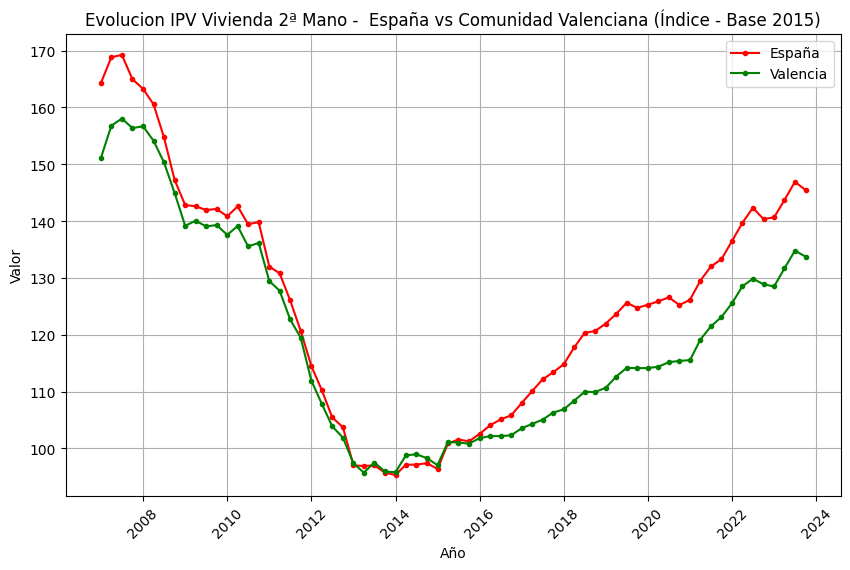

In [94]:
# Filtrar los diferentes tipos de datos
general = IPV_naci_tip_indice[IPV_naci_tip_indice['TipoV'] == 'Vivienda segunda mano']
valencia = ipv_cv[ipv_cv['TipoV'] == 'Vivienda segunda mano']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(general['Periodo'], general['Total'], label='España', marker='o', markersize=3, color = "red")
plt.plot(valencia['Periodo'], valencia['Total'], label='Valencia', marker='o', markersize=3, color = "green")

# Configurar el título y los ejes
plt.title('Evolucion IPV Vivienda 2ª Mano -  España vs Comunidad Valenciana (Índice - Base 2015)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("3.5 Evolucion IPV Vivienda 2 mano -  España vs Comunidad Valenciana (Índice - Base 2015).jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()